In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from nitropulse import BBCH

In [3]:
pheno = BBCH(workspace_dir='/home/morteza/.nitropulse')
df = pheno.run()
print(df.shape)
df.head()

Local directory for RISMA data: /home/morteza/.nitropulse/inputs/RISMA_CSV_files
Found 30 files in RISMA directory.


Loading RISMA files:   0%|          | 0/30 [00:00<?, ?it/s]

Processing RISMA file: /home/morteza/.nitropulse/inputs/RISMA_CSV_files/RISMA_MB8.csv for station MB8
Processing RISMA file: /home/morteza/.nitropulse/inputs/RISMA_CSV_files/RISMA_MB18.csv for station MB18
Processing RISMA file: /home/morteza/.nitropulse/inputs/RISMA_CSV_files/RISMA_MB24.csv for station MB24
Processing RISMA file: /home/morteza/.nitropulse/inputs/RISMA_CSV_files/RISMA_MB12.csv for station MB12
Processing RISMA file: /home/morteza/.nitropulse/inputs/RISMA_CSV_files/RISMA_MB17.csv for station MB17
Processing RISMA file: /home/morteza/.nitropulse/inputs/RISMA_CSV_files/RISMA_SK2.csv for station SK2
Processing RISMA file: /home/morteza/.nitropulse/inputs/RISMA_CSV_files/RISMA_MB20.csv for station MB20
Processing RISMA file: /home/morteza/.nitropulse/inputs/RISMA_CSV_files/RISMA_MB4.csv for station MB4
Processing RISMA file: /home/morteza/.nitropulse/inputs/RISMA_CSV_files/RISMA_MB26.csv for station MB26
Processing RISMA file: /home/morteza/.nitropulse/inputs/RISMA_CSV_file

Loading S1 files:   0%|          | 0/30 [00:00<?, ?it/s]

Calculating BBCH:   0%|          | 0/10354 [00:00<?, ?it/s]

(10354, 29)


,index,date,op,vh,vv,angle,lc,station,depth,mean_sst,...,clay,classification,year,doy,base_temp,cum_gdd_air,cum_gdd_soil,cum_gdd,bbch,cum_ssm
0,0,2015-03-13 00:31:30,0,-21.0,-11.0,45.0,146,MB18,NaN,NaN,...,NaN,NaN,2015,72,5.0,NaN,NaN,NaN,NaN,NaN
1,0,2015-03-13 00:31:30,0,-20.0,-10.0,45.0,146,MB19,NaN,NaN,...,NaN,NaN,2015,72,5.0,NaN,NaN,NaN,NaN,NaN
2,0,2015-03-13 00:31:30,0,-24.0,-19.0,45.0,146,MB17,NaN,NaN,...,NaN,NaN,2015,72,5.0,NaN,NaN,NaN,NaN,NaN
3,0,2015-03-13 00:31:30,0,-20.0,-13.0,45.0,34,MB16,NaN,NaN,...,NaN,NaN,2015,72,5.0,NaN,NaN,NaN,NaN,NaN
4,0,2015-03-13 00:31:55,0,-19.0,-10.0,41.0,146,MB26,NaN,NaN,...,NaN,NaN,2015,72,5.0,NaN,NaN,NaN,NaN,NaN


In [4]:
# df = df[df['lc'] != 177].copy()
# df.shape

In [5]:
# count records per year for lc 162 and 177
counts = df[df['lc'].isin([30, 34, 162])].groupby(['lc', 'year', 'station']).size().unstack(fill_value=0).sort_index(axis=1)
counts

,station
lc,year


In [6]:
# also print totals per lc (optional)
print("\nTotals per lc:")
print(counts.sum(axis=1))


Totals per lc:
Series([], dtype: float64)


In [7]:
# save the DataFrame to a CSV file
df.to_csv('/home/morteza/.nitropulse/outputs/pheno_df.csv', index=False)

In [8]:
# import pandas as pd

# df = pd.read_csv('~/.nitropulse/outputs/pheno_df.csv').dropna(subset=['bbch'])
# print(df.shape)
# df.tail()

In [9]:
df['lc'] = df['lc'].astype(int)
# Get unique crop types (all 8 crop types)
crop_types = df['lc'].unique()  # Replace 'lc' with your crop type column name
crop_types = sorted(crop_types)  # Take all 8 crop types
crop_types

[np.int64(30),
 np.int64(34),
 np.int64(110),
 np.int64(122),
 np.int64(133),
 np.int64(136),
 np.int64(146),
 np.int64(147),
 np.int64(153),
 np.int64(157),
 np.int64(158),
 np.int64(162),
 np.int64(167),
 np.int64(177)]

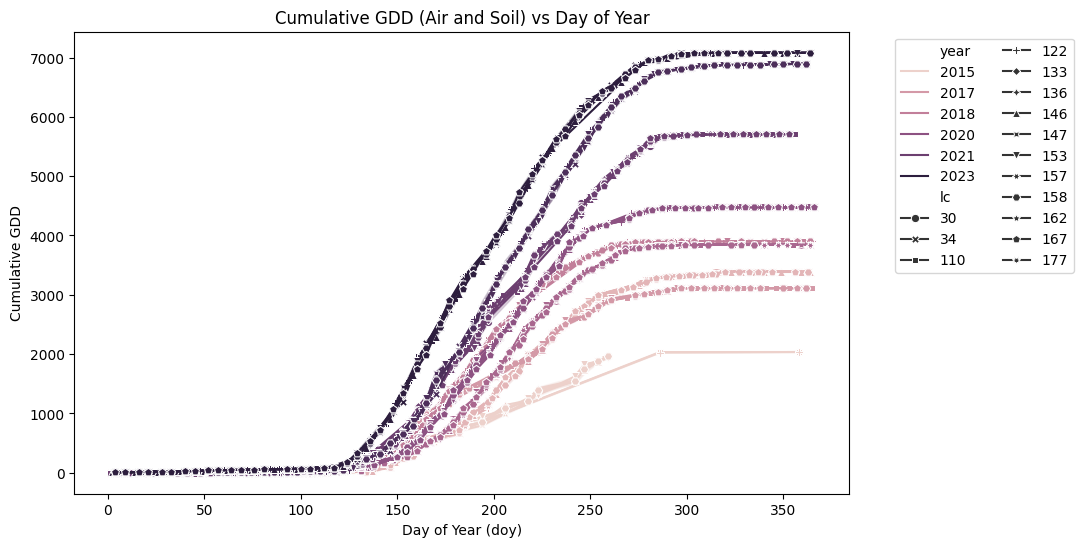

In [10]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='doy', y='cum_gdd', data=df, hue='year', style='lc', markers=True, dashes=False)
plt.xlabel('Day of Year (doy)')
plt.ylabel('Cumulative GDD')
plt.title('Cumulative GDD (Air and Soil) vs Day of Year')
plt.legend(ncol=2, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

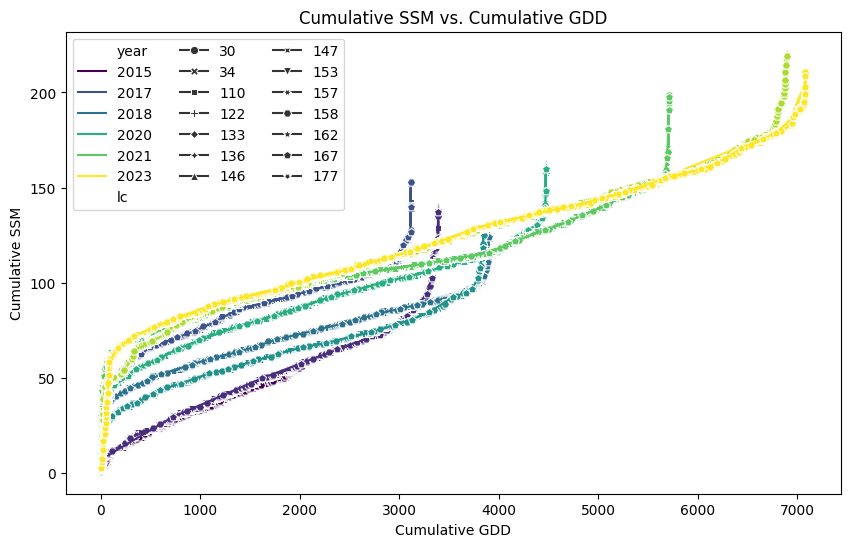

In [11]:
# Create the line plot using seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.lineplot(x='cum_gdd', y='cum_ssm', hue='year', data=df, palette='viridis', style='lc', markers=True, dashes=False)  # Use 'year' for color
plt.xlabel('Cumulative GDD')
plt.ylabel('Cumulative SSM')
plt.title('Cumulative SSM vs. Cumulative GDD')
plt.legend(ncol=3, loc='upper left')
plt.show()

In [12]:
df_bare = df[df.lc.isin([30, 34])].copy()
print(df_bare.shape)
df_bare.head()

(418, 29)


,index,date,op,vh,vv,angle,lc,station,depth,mean_sst,...,clay,classification,year,doy,base_temp,cum_gdd_air,cum_gdd_soil,cum_gdd,bbch,cum_ssm
3,0,2015-03-13 00:31:30,0,-20.0,-13.0,45.0,34,MB16,NaN,NaN,...,NaN,NaN,2015,72,5.0,NaN,NaN,NaN,NaN,NaN
18,1,2015-04-06 00:31:29,0,-19.0,-14.0,45.0,34,MB16,NaN,NaN,...,NaN,NaN,2015,96,5.0,NaN,NaN,NaN,NaN,NaN
35,2,2015-04-18 00:31:30,0,-22.0,-15.0,45.0,34,MB16,NaN,NaN,...,NaN,NaN,2015,108,5.0,NaN,NaN,NaN,NaN,NaN
54,3,2015-04-25 00:23:20,0,-21.0,-15.0,36.0,34,MB16,NaN,NaN,...,NaN,NaN,2015,115,5.0,NaN,NaN,NaN,NaN,NaN
73,4,2015-04-30 00:31:31,0,-22.0,-14.0,45.0,34,MB16,NaN,NaN,...,NaN,NaN,2015,120,5.0,NaN,NaN,NaN,NaN,NaN


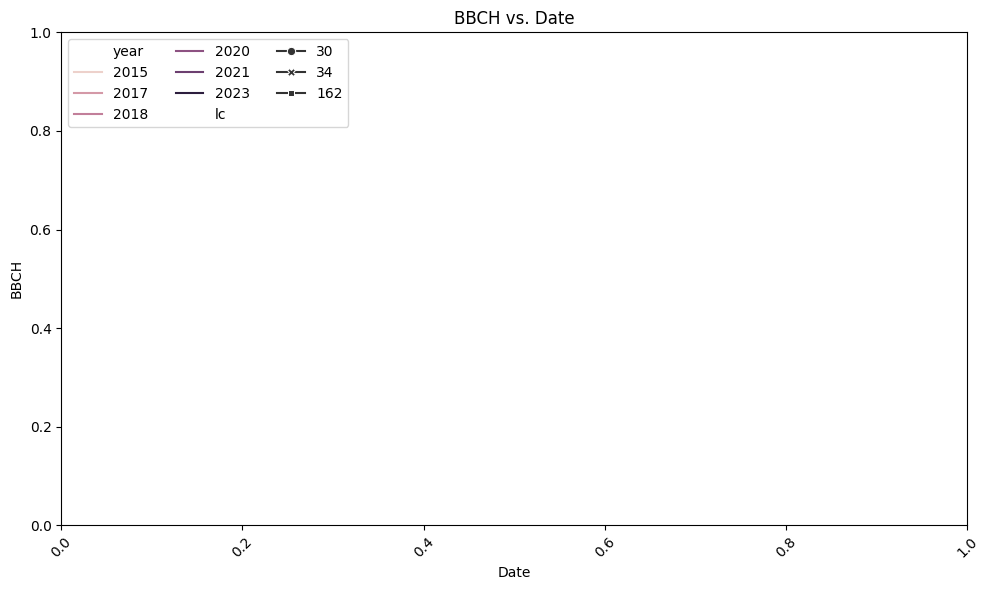

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='doy', y='bbch', data=df[df.lc.isin([30, 34, 162])], hue='year', style='lc', markers=True, dashes=False)
plt.xlabel('Date')
plt.ylabel('BBCH')
plt.title('BBCH vs. Date')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.legend(ncol=3, loc='upper left')
plt.show()

In [14]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year.astype(str)  # Extract year from date
df['doy'] = df['date'].dt.dayofyear.astype(int)  # Extract day of year from date

In [15]:
# Get unique crop types (all 8 crop types)
crop_types = df['lc'].unique()  # Replace 'lc' with your crop type column name
crop_types = sorted(crop_types)  # Take all 8 crop types
crop_types

[np.int64(30),
 np.int64(34),
 np.int64(110),
 np.int64(122),
 np.int64(133),
 np.int64(136),
 np.int64(146),
 np.int64(147),
 np.int64(153),
 np.int64(157),
 np.int64(158),
 np.int64(162),
 np.int64(167),
 np.int64(177)]

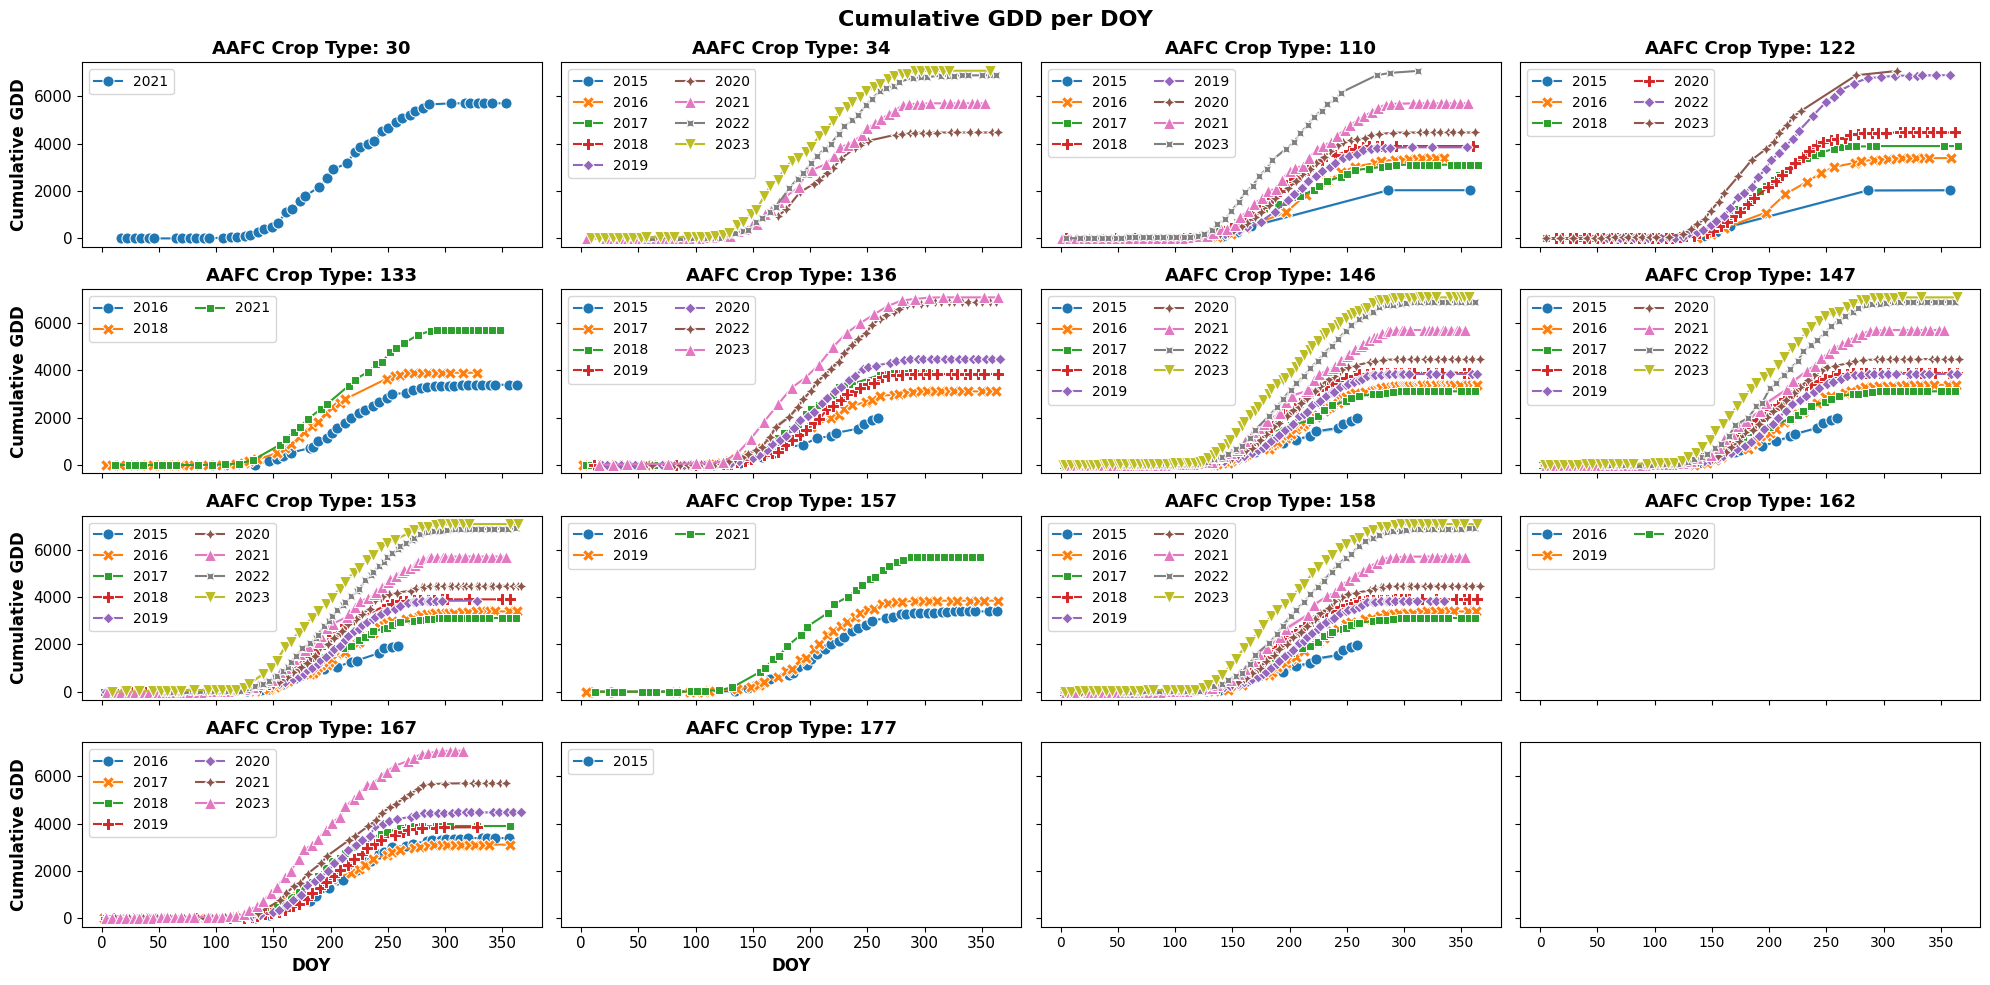

In [16]:
fig, axes = plt.subplots(4, 4, figsize=(20, 10), sharex=True, sharey=True)
fig.suptitle('Cumulative GDD per DOY', fontsize=16, fontweight='bold')

# # Get unique crop types (all 8 crop types)
# crop_types = df['lc'].unique()  # Replace 'lc' with your crop type column name
# crop_types = sorted(crop_types)[:8]  # Take all 8 crop types

# Plot crop height for each crop type
for i, crop in enumerate(crop_types):
    row = i // 4  # Determine row (0 or 1)
    col = i % 4   # Determine column (0, 1, 2, or 3)
    
    crop_data = df[df['lc'] == crop]  # Replace 'lc' with your crop type column
    
    # Plot crop height vs DOY with year as hue and crop type as style
    sns.lineplot(x='doy', y='cum_gdd', data=crop_data, 
                 hue='year', 
                 style='year', 
                 markers=True, dashes=False, markersize=8, ax=axes[row, col], palette='tab10')
    
    axes[row, col].set_title(f'AAFC Crop Type: {crop}', fontsize=13, fontweight='bold')
    axes[row, col].set_xlabel('DOY', fontsize=12, fontweight='bold')
    axes[row, col].set_ylabel('Cumulative GDD', fontsize=12, fontweight='bold')
    axes[row, col].tick_params(labelsize=11)
    
    # Adjust legend for each subplot
    legend = axes[row, col].get_legend()
    if legend:
        axes[row, col].legend(ncol=2, loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

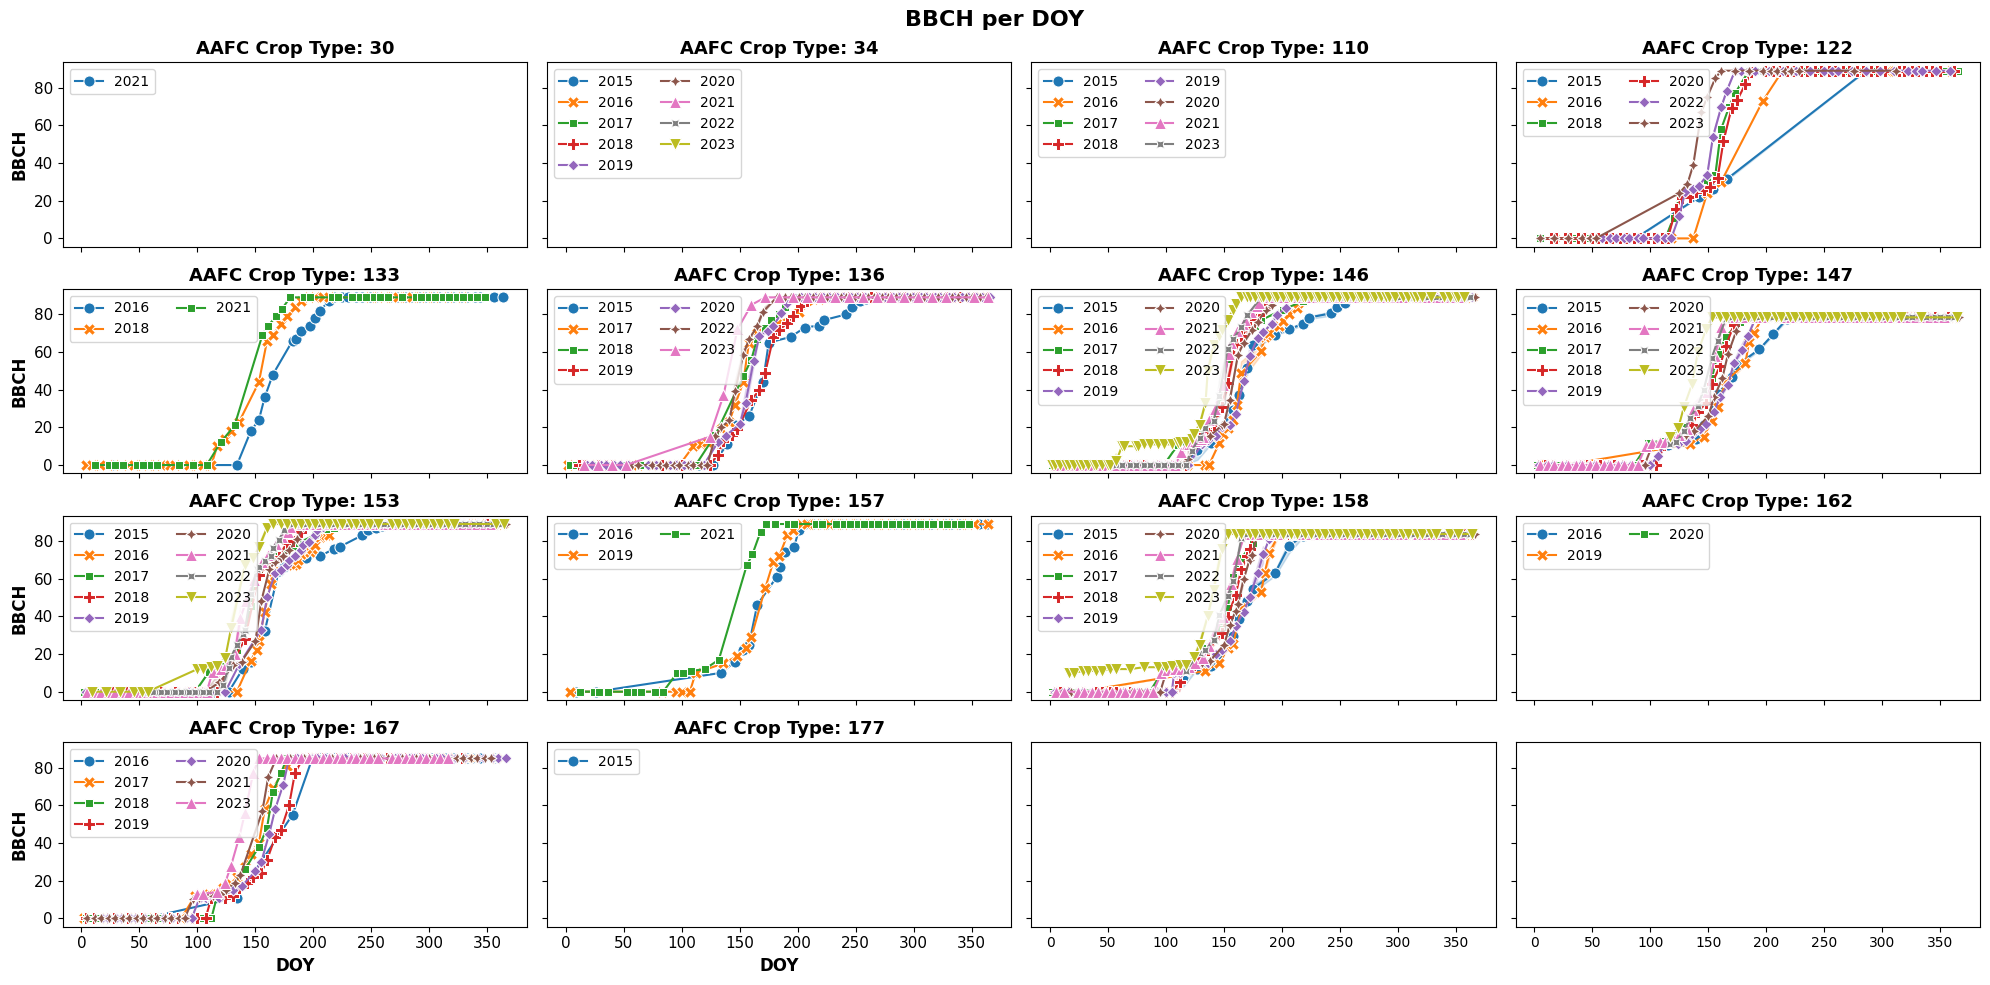

In [17]:
fig, axes = plt.subplots(4, 4, figsize=(20, 10), sharex=True, sharey=True)
fig.suptitle('BBCH per DOY', fontsize=16, fontweight='bold')



# Plot crop height for each crop type
for i, crop in enumerate(crop_types):
    row = i // 4  # Determine row (0 or 1)
    col = i % 4   # Determine column (0, 1, 2, or 3)
    
    crop_data = df[df['lc'] == crop]  # Replace 'lc' with your crop type column
    
    # Plot crop height vs DOY with year as hue and crop type as style
    sns.lineplot(x='doy', y='bbch', data=crop_data, 
                 hue='year', 
                 style='year', 
                 markers=True, dashes=False, markersize=8, ax=axes[row, col], palette='tab10')
    
    axes[row, col].set_title(f'AAFC Crop Type: {crop}', fontsize=13, fontweight='bold')
    axes[row, col].set_xlabel('DOY', fontsize=12, fontweight='bold')
    axes[row, col].set_ylabel('BBCH', fontsize=12, fontweight='bold')
    axes[row, col].tick_params(labelsize=11)
    
    # Adjust legend for each subplot
    legend = axes[row, col].get_legend()
    if legend:
        axes[row, col].legend(ncol=2, loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

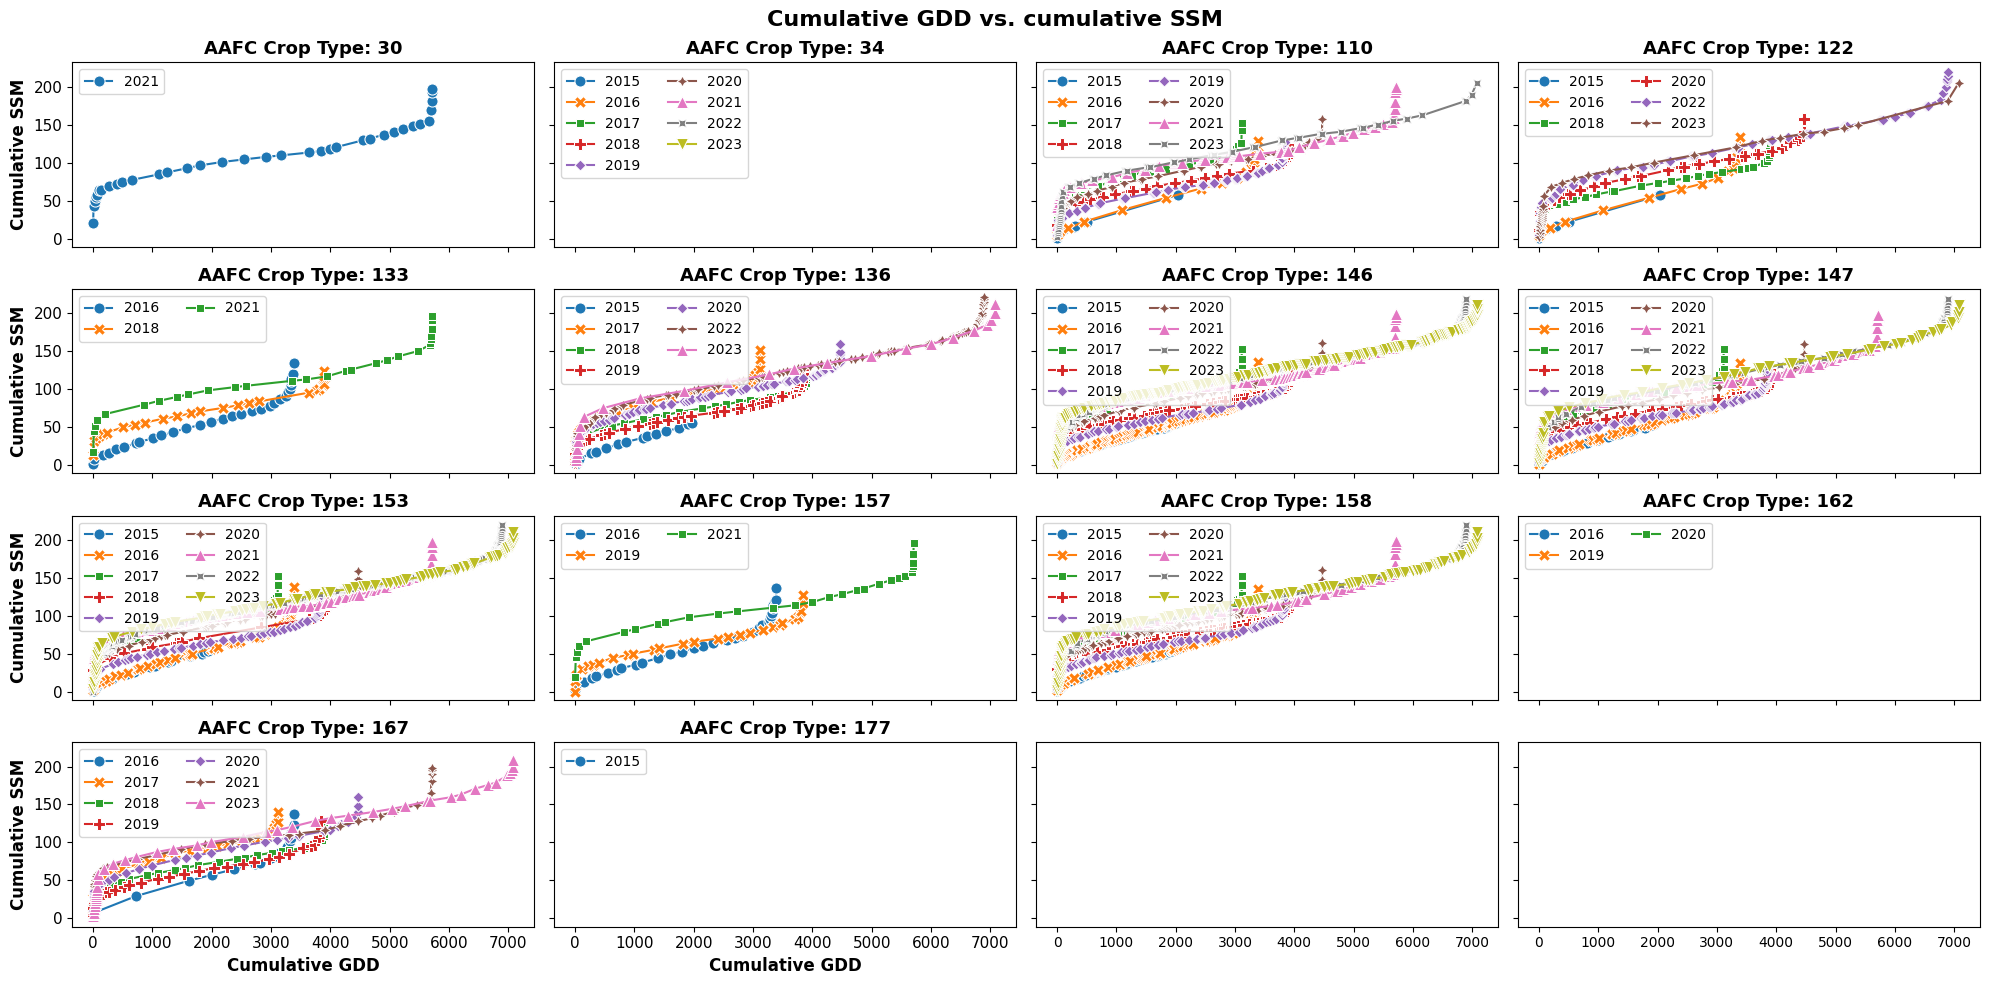

In [18]:
fig, axes = plt.subplots(4, 4, figsize=(20, 10), sharex=True, sharey=True)
fig.suptitle('Cumulative GDD vs. cumulative SSM', fontsize=16, fontweight='bold')

# # Get unique crop types (all 8 crop types)
# crop_types = df['lc'].unique()  # Replace 'lc' with your crop type column name
# crop_types = sorted(crop_types)[:8]  # Take all 8 crop types

# Plot crop height for each crop type
for i, crop in enumerate(crop_types):
    row = i // 4  # Determine row (0 or 1)
    col = i % 4   # Determine column (0, 1, 2, or 3)
    
    crop_data = df[df['lc'] == crop]  # Replace 'lc' with your crop type column
    
    # Plot crop height vs DOY with year as hue and crop type as style
    sns.lineplot(x='cum_gdd', y='cum_ssm', data=crop_data, 
                 hue='year', 
                 style='year', 
                 markers=True, dashes=False, markersize=8, ax=axes[row, col], palette='tab10')
    
    axes[row, col].set_title(f'AAFC Crop Type: {crop}', fontsize=13, fontweight='bold')
    axes[row, col].set_xlabel('Cumulative GDD', fontsize=12, fontweight='bold')
    axes[row, col].set_ylabel('Cumulative SSM', fontsize=12, fontweight='bold')
    axes[row, col].tick_params(labelsize=11)
    
    # Adjust legend for each subplot
    legend = axes[row, col].get_legend()
    if legend:
        axes[row, col].legend(ncol=2, loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()